# Quantum Harmonic Oscillator Heat Engine: Paper Plots
This Jupyter Notebook produces all plots in the manuscript relative to the quantum harmonic oscillator heat engine if the ```paper_plot_data``` was downloaded. Such data can alternatively be generated using ```0_train.ipynb``` and ```1_produce_pareto.ipynb```. For details on the system, see ```0_train.ipynb```.
#### Import modules

In [1]:
import sys
import os
sys.path.append(os.path.join('..','src'))
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.lines import Line2D
import plotting

## Produce Fig. 5

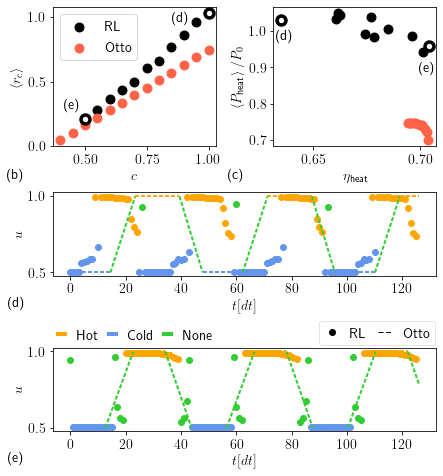

In [4]:
main_dir = "../paper_plot_data/harmonic_engine/pareto/"

rl_pareto_file = os.path.join(main_dir, "det_pareto.txt")
otto_pareto_file = os.path.join(main_dir, "otto_pareto.txt")
cycle_0_file = os.path.join(main_dir, "2022_01_16-15_07_57_a=1.0/saved_policies/det_policy.txt")
cycle_1_file = os.path.join(main_dir, "2022_01_15-03_20_49_a=0.5/saved_policies/det_policy.txt") 
selected_cycle_cvals = [1.,0.5]
actions_to_plot_0 = 126
actions_to_plot_1 = 126
actions_line_style = "scatter"
marker_size=80
actions_ylim = None
prot_linewidth = 36
extra_cycles_linewidth = 1.5
custom_colors=["orange","cornflowerblue","limegreen"]
extra_cycles_0 = plotting.produce_otto_cycle(u_min=0.5,u_max=1.,t1=2.9,t2=1.79,t3=3.2,t4=1.67,dt=0.2,
                                             t_range=[0,actions_to_plot_0*0.2])
extra_cycles_linewidth_0 = 2.
extra_cycles_1 = plotting.produce_otto_cycle(u_min=0.5,u_max=1.,t1=2.54,t2=2.01,t3=2.31,t4=1.9,dt=0.2,
                                             t_range=[0,actions_to_plot_1*0.2])
extra_cycles_linewidth_1 = 2.
rl_legend_lines = [Line2D([0], [0], color='black', linewidth=0., marker="o"), 
                        Line2D([0], [0], color='black', linewidth=1, dashes=(4/0.8,2/0.8))]
rl_legend_text = ["RL","Otto"]
rl_legend_location = [0.72, 0.274]
rl_line_length = 1
rl_column_spacing=0.8
legend_column_spacing=0.8
action_legend_lines_1 = [Line2D([0], [0], color='orange', linewidth=4), 
                        Line2D([0], [0], color='cornflowerblue', linewidth=4),
                        Line2D([0], [0], color='limegreen', linewidth=4)]
action_legend_text_1 = ["Hot","Cold","None"]
action_legend_location_1 = [0., 1.]
legend_line_length_1 = 0.5
legend_line_length_0 = 2
plot_file_name = "fig_5.pdf"

#font size
matplotlib.rcParams.update({'font.size': 14, "text.usetex": True,
                            'text.latex.preamble' : r'\usepackage{amsmath}\usepackage{physics}'})

#create the figure and subplots
fig = plt.figure(constrained_layout=True, figsize=(6,6.5))
gs = gridspec.GridSpec(3, 2, figure=fig, height_ratios = [2,1.2,1.2])
figmerit_ax = fig.add_subplot(gs[0, 0])
pareto_ax = fig.add_subplot(gs[0, 1])
prot_0_ax = fig.add_subplot(gs[1, :])
prot_1_ax = fig.add_subplot(gs[2, :])

#useful dicts to read data
quantity_ind = {'pow': 0, 'entropy': 1, 'eff':2, 'a': 3, 'h': 4}


#load pareto data
rl_data = np.loadtxt(rl_pareto_file)
otto_data = np.loadtxt(otto_pareto_file)
chosen_masks = np.full((4,) + rl_data[:,quantity_ind["a"]].shape, False)
not_chosen_mask = np.full( rl_data[:,quantity_ind["a"]].shape, False)
for i, cval in enumerate(selected_cycle_cvals):
    chosen_masks[i,:] = np.logical_or(chosen_masks[i,:], np.isclose(rl_data[:,quantity_ind["a"]], cval))
    not_chosen_mask = np.logical_or(not_chosen_mask,chosen_masks[i,:])
not_chosen_mask = np.logical_not(not_chosen_mask)

#figmerit panel (panel a)
figmerit_ax.scatter(rl_data[not_chosen_mask,quantity_ind["a"]], rl_data[not_chosen_mask,quantity_ind["h"]],
                    s=marker_size, marker="o", label="RL",c="black")
figmerit_ax.scatter(otto_data[:,quantity_ind["a"]], otto_data[:,quantity_ind["h"]], s=marker_size,
                    marker="o",label="Otto",c="tomato")
for i in range(len(selected_cycle_cvals)):
    figmerit_ax.scatter(rl_data[chosen_masks[i,:],quantity_ind["a"]],rl_data[chosen_masks[i,:],quantity_ind["h"]],
                      s=marker_size, marker="o",c="white",linewidths=3.5, edgecolors="black")    
figmerit_ax.set_xlabel(r"$c$")
figmerit_ax.set_ylabel(r"$\ev{r_c}$")
figmerit_ax.legend()

#Pareto front (panel b)
pareto_ax.scatter(rl_data[not_chosen_mask,quantity_ind["eff"]],rl_data[not_chosen_mask,quantity_ind["pow"]],
                  s=marker_size, marker="o", label="RL",c="black")
pareto_ax.scatter(otto_data[:,quantity_ind["eff"]],otto_data[:,quantity_ind["pow"]], s=marker_size,
                  marker="o", label="Otto",c="tomato")
for i in range(len(selected_cycle_cvals)):
    pareto_ax.scatter(rl_data[chosen_masks[i,:],quantity_ind["eff"]],rl_data[chosen_masks[i,:],quantity_ind["pow"]],
                      s=marker_size, marker="o",c="white",linewidths=3.5, edgecolors="black")
pareto_ax.set_xlabel(r"$\eta_{\text{heat}}$")
pareto_ax.set_ylabel(r"$\ev{P_\text{heat}}/P_0$")

#first protocol (panel c)
plotting.plot_actions_on_axis(cycle_0_file, prot_0_ax, actions_to_plot=actions_to_plot_0,custom_colors=custom_colors,
                                is_tri=True, k_notation=False, x_count_from_zero=True,
                                linewidth = prot_linewidth, xlabel="$t[dt]$",extra_cycles=extra_cycles_0,
                                extra_cycles_linewidth=extra_cycles_linewidth_0, legend_column_spacing=legend_column_spacing,
                                hide_gray_vertical_line=True,legend_line_length=legend_line_length_0,
                                line_style=actions_line_style)

#second protocol (panel d)
plotting.plot_actions_on_axis(cycle_1_file, prot_1_ax, actions_to_plot=actions_to_plot_1,custom_colors=custom_colors,
                                is_tri=True, k_notation=False, x_count_from_zero=True,
                                linewidth = prot_linewidth, xlabel="$t[dt]$",extra_cycles=extra_cycles_1,
                                extra_cycles_linewidth=extra_cycles_linewidth_1, legend_lines=action_legend_lines_1,
                                legend_text=action_legend_text_1, legend_location=action_legend_location_1,
                                hide_gray_vertical_line=True,legend_line_length=legend_line_length_1,
                                line_style=actions_line_style, legend_column_spacing=legend_column_spacing)

#legend
fig.legend(rl_legend_lines,rl_legend_text,loc=rl_legend_location,fancybox=True, framealpha=0.5,borderaxespad=0.,
                    ncol=2,handlelength=rl_line_length,columnspacing=rl_column_spacing) 

#extra labels 
figmerit_ax.text(0.73,0.89, r"(d)", transform=figmerit_ax.transAxes)
figmerit_ax.text(0.07,0.27, r"(e)", transform=figmerit_ax.transAxes)
pareto_ax.text(0.015,0.76, r"(d)", transform=pareto_ax.transAxes)
pareto_ax.text(0.89,0.53, r"(e)", transform=pareto_ax.transAxes)

#panel numbering labels
fig.text(-0.28,-0.23, r"(b)",transform=figmerit_ax.transAxes)
fig.text(-0.28,-0.23, r"(c)",transform=pareto_ax.transAxes)
fig.text(-0.118,-0.37, r"(d)",transform=prot_0_ax.transAxes)
fig.text(-0.118,-0.36, r"(e)",transform=prot_1_ax.transAxes)

#save figure
plt.savefig(plot_file_name)
#show
plt.show()

## Produce Fig. 9

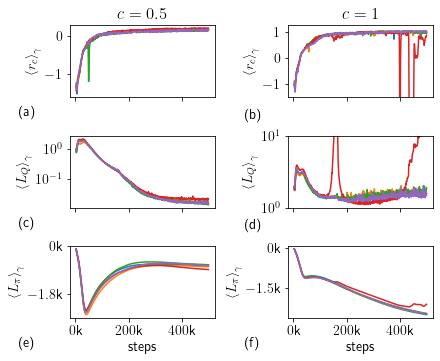

In [2]:
#folders containing the log folders
left_panel_dir = "../paper_plot_data/harmonic_engine/5_extra_runs/a=0.5"
right_panel_dir = "../paper_plot_data/harmonic_engine/5_extra_runs/a=1.0"

#in the following, first index is left panel, second index is right panel
skip_lines = 2
reward_ylim = [None,[-1.5, 1.3]]
reward_ylabel= [r"$\ev*{r_c}_\gamma$", r"$\ev*{r_c}_\gamma$"]
y_ticks = [[[0.1,1.],None],[[1,10],None]] 
custom_colors = ["tab:blue", "tab:orange", "tab:green", "tab:red", "tab:purple"]
y_lims = [[None, None], [[1,5.1], None]] 
reward_yticks = [None,None] 
plot_file_location = "fig_9.pdf"

#font size
matplotlib.rcParams.update({'font.size': 14, "text.usetex": True,
                            'text.latex.preamble' : r'\usepackage{amsmath}\usepackage{physics}'})

#create the figure and subplots
fig = plt.figure(constrained_layout=True, figsize=(6,4.9))
gs = gridspec.GridSpec(3, 2, figure=fig)
reward_ax = [fig.add_subplot(gs[0, 0]), fig.add_subplot(gs[0, 1])]
q_loss_ax = [fig.add_subplot(gs[1, 0],sharex=reward_ax[0]), fig.add_subplot(gs[1, 1],sharex=reward_ax[1])]
pi_loss_ax = [fig.add_subplot(gs[2, 0],sharex=reward_ax[0]), fig.add_subplot(gs[2, 1],sharex=reward_ax[1])]
plt.setp(reward_ax[0].get_xticklabels(), visible=False)          
plt.setp(reward_ax[1].get_xticklabels(), visible=False)          
plt.setp(q_loss_ax[0].get_xticklabels(), visible=False)          
plt.setp(q_loss_ax[1].get_xticklabels(), visible=False)          

#create lists with all the log folders (first index left panel, second index right panel)
running_reward_files = [[],[]]
running_loss_files = [[],[]]
for (i, main_dir) in enumerate([left_panel_dir,right_panel_dir]):
    for sub_dir in os.listdir(main_dir):
        running_reward_file, running_loss_file, _, _ = \
            plotting.log_sac_file_locations(os.path.join(main_dir,sub_dir),None,None,None,None)
        running_reward_files[i].append(running_reward_file)
        running_loss_files[i].append(running_loss_file)
    
#loop over left and right panel
for i in range(2):
    #loop over each training curve
    for j, (running_reward_file, running_loss_file) in enumerate(zip(running_reward_files[i],running_loss_files[i])): 
        #running reward panel
        plotting.plot_running_reward_on_axis(running_reward_file, reward_ax[i],ylim=reward_ylim[i],
            custom_colors=[custom_colors[j]], ylabel=reward_ylabel[i], yticks=reward_yticks[i], xlabel="",
            skip_lines=skip_lines)
        #running losses panel
        plotting.plot_running_loss_on_axis(running_loss_file, (q_loss_ax[i], pi_loss_ax[i]), x_labels=["", "steps"],
            y_labels=[r"$\ev*{L_Q}_\gamma$", r"$\ev*{L_\pi}_\gamma$"], y_k_notations=[False, True], y_ticks=y_ticks[i],
            custom_colors=[custom_colors[j] for _ in range(2)], y_lims = y_lims[i], skip_lines=skip_lines)

#add title at the top
reward_ax[0].set_title(r"$c=0.5$")
reward_ax[1].set_title(r"$c=1$")
    
#add the panel labels
reward_ax[0].text(-0.35,-0.27, r'{(a)}', transform=reward_ax[0].transAxes)
reward_ax[1].text(-0.29,-0.3, r'{(b)}', transform=reward_ax[1].transAxes)
q_loss_ax[0].text(-0.35,-0.27, r'{(c)}', transform=q_loss_ax[0].transAxes)
q_loss_ax[1].text(-0.29,-0.3, r'{(d)}', transform=q_loss_ax[1].transAxes)
pi_loss_ax[0].text(-0.35,-0.4, r'{(e)}', transform=pi_loss_ax[0].transAxes)
pi_loss_ax[1].text(-0.29,-0.4, r'{(f)}', transform=pi_loss_ax[1].transAxes)
        
#save file
plt.savefig(plot_file_location)
#show
plt.show()